# Taller 5 - Morfología matemática

# Punto 7 - Ejercicio de síntesis taller 5

**Integrantes - Grupo 9**

Santiago Tinjacá Roncancio

## 6.0 Inicialización.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import dilation, erosion, opening, closing, rectangle
from scipy.ndimage import morphological_gradient
from skimage.filters import sobel_h, sobel_v, sobel
from skimage import exposure

### 7.1 Cargado y visualización de la imagen.

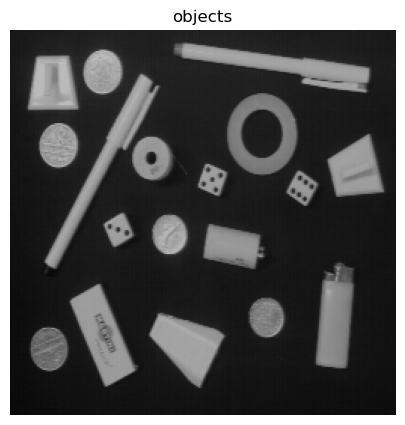

In [3]:
ruta_objects = './images/objects.png'
img_objects = cv2.imread(ruta_objects, cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_objects, cmap='gray', vmin=0, vmax=255)
ax.set_title('objects')
ax.axis('off')
plt.show()

### 7.2 Umbralizado de la imagen para ceparar los objetos del fondo.



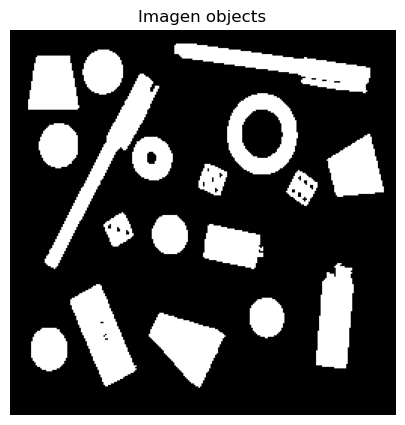

In [73]:
img_objects_bin = cv2.threshold(img_objects, 70, 255, cv2.THRESH_BINARY)[1]

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(img_objects_bin, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen objects')
ax.axis('off')
plt.show()

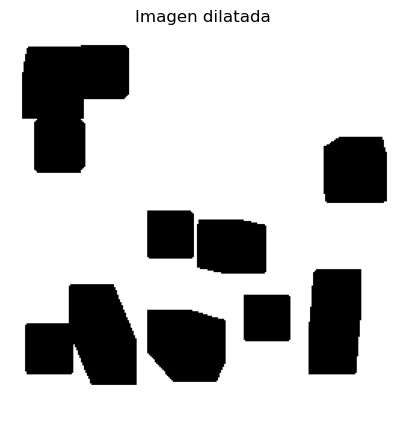

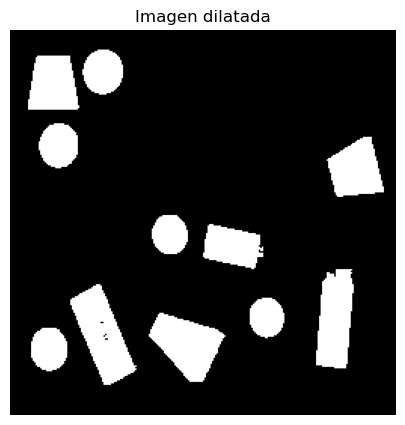

In [ ]:
def create_cross_mask(size):
    mask = np.full((size, size), np.nan)
    center = size // 2
    mask[center, :] = 1
    mask[:, center] = 1
    return mask

cross_mask = rectangle(3, 3)
dilated_image = img_objects_bin
for i in range(1):
    dilated_image = dilation(dilated_image, footprint=cross_mask)

cross_mask = rectangle(19, 19)
for i in range(1):
    dilated_image = erosion(dilated_image, footprint=cross_mask)

cross_mask = create_cross_mask(5)
for i in range(7):
    dilated_image = dilation(dilated_image, footprint=cross_mask)

img_objects_bin_inv = cv2.bitwise_not(img_objects_bin)
dilated_image = cv2.bitwise_not(dilated_image)

max_image = np.maximum(dilated_image, img_objects_bin_inv)

max_image_inv = cv2.bitwise_not(max_image)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(dilated_image, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen mascara')
ax.axis('off')
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(max_image_inv, cmap='gray', vmin=0, vmax=255)
ax.set_title('Imagen resultado')
ax.axis('off')
plt.show()



Para conservar únicamente los objetos con un espesor de al menos 15 píxeles en la imagen binaria, se aplicó una serie de operaciones morfológicas. Primero, se realizó una dilatación inicial con un elemento estructurante rectangular de 3x3 píxeles para cerrar pequeños huecos dentro de los objetos de interés. Luego, se aplicó una erosión con un elemento estructurante de 19x19 píxeles para eliminar los objetos más delgados, preservando únicamente aquellos con un espesor mayor o igual a 15 píxeles.

Posteriormente, se realizaron múltiples dilataciones con un elemento cruz de 5x5 píxeles para reconstruir la forma de los objetos seleccionados, asegurando su correcta identificación en la imagen. Finalmente, la imagen resultante se combinó con la imagen binaria original utilizando una operación de máximo entre ambas, permitiendo resaltar los objetos de interés mientras se mantenía la estructura general de la imagen.